In [1]:
from tools.video_tools import Editor
from tools.frame_detector import FrameDetector
from matplotlib import pyplot as plt
import matplotlib.patches as patches
file_name = "test/samples/sample_episode.mp4"
editor = Editor(file_path=file_name)

In [3]:
h, w = editor.h, editor.w
frames = editor.get_frame_every_x_seconds(x=2, crop=(h//2, h, w//2, w), blackAndWhite=True)
frames_dict = {f[0]: f[1] for f in frames}


In [4]:
detector = FrameDetector(frames_dict)
detector.detect()
best = detector.get_best_results()

100%|██████████| 1559/1559 [01:39<00:00, 15.63it/s]


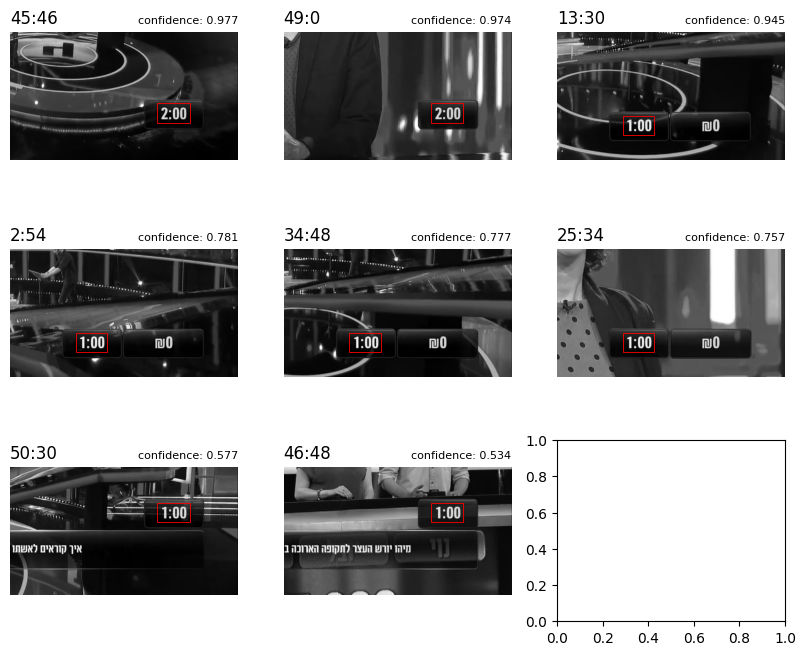

In [16]:
def show(frames):
    fig, axs = plt.subplots((len(frames) + 1) // 3, 3, figsize=(10,8))
    axs = axs.flatten()
    for i, frame in enumerate(frames):
        m, s = divmod(frame.stamp, 60)
        x1, y1 = frame.rect[0]
        x2, y2 = frame.rect[2]
        w, h = x2 - x1, y2 - y1
        axs[i].axis('off')   
        axs[i].set_title(f"{int(m)}:{int(s)}", loc="left")
        axs[i].set_title("confidence: {:.3}".format(frame.confidence), fontsize=8, loc="right")
        rect = patches.Rectangle((x1 - 5, y1 - 5), w + 5, h + 5, linewidth=0.6, edgecolor='r', facecolor='none')
        axs[i].add_patch(rect)
        axs[i].imshow(frames_dict[frame.stamp], cmap="gray")

show(best)